<a href="https://colab.research.google.com/github/tasty-orange/ARN-labs/blob/main/ARN_PW3_COMPETITION_Piemontesi_Trueb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practical Work 3 ARN - G.Piemontesi & G.Trueb

## Compétition : Classification « awake », « n-rem » et « rem ».

Même chose que l'expérience 2, mais cette fois-ci pour la compétition!

### Import des packages/dépendances



In [1]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
import keras
from keras.models import Sequential
from keras.layers import Input, Dense
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report, f1_score
from collections import Counter
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras import regularizers
from tensorflow import keras
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score
from tensorflow.keras.layers import BatchNormalization
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix
from tensorflow import keras
from tensorflow.keras.models import load_model

### Import des données des souris

In [2]:
# Chargement des données d'entraînement
mice_eeg_1 = pd.read_csv('EEG_mouse_data_1.csv')
mice_eeg_2 = pd.read_csv('EEG_mouse_data_2.csv')

# Fusion des deux jeux de données d'entraînement
data_training = pd.concat([mice_eeg_1, mice_eeg_2])

###Preprocessing et normalisation des données

Comme on peut le voir dans le diagramme en barres ci-dessous, le sommeil des souris se divise en trois états : « awake », « NREM » et « REM ». Contrairement à l'approche binaire de la première expérience, nous conservons ici ces trois classes distinctes pour l'analyse.

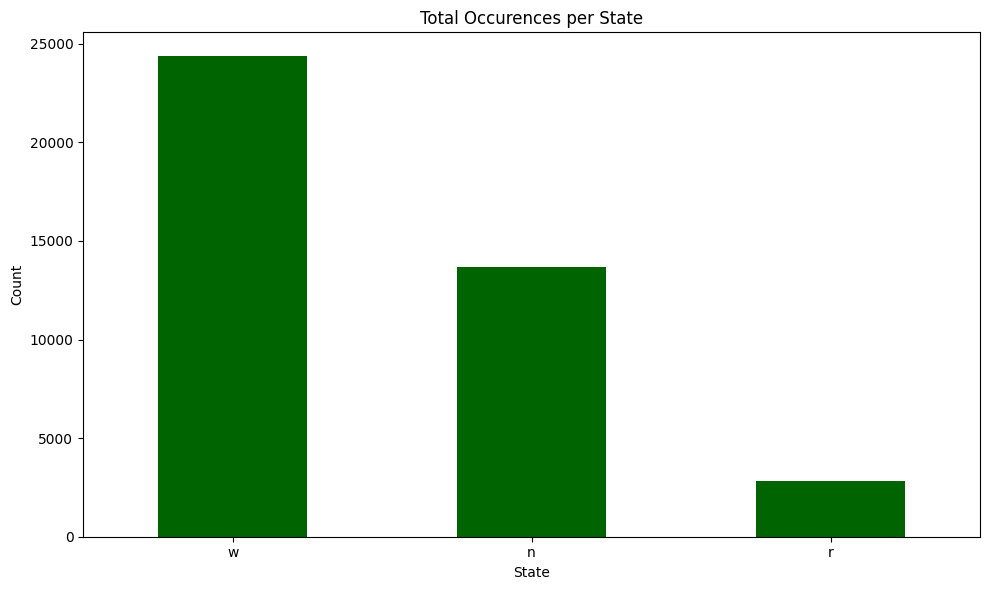

In [21]:
# Visualisation de la distribution des états
plt.figure(figsize=(10, 6))
data_training.state.value_counts().plot(kind='bar', color='darkgreen')
plt.title('Total Occurences per State')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.xlabel('State')
plt.tight_layout()
plt.show()

In [4]:
# Séparer les caractéristiques et la variable cible
input_data = data_training.drop('state', axis=1).values
output_data = data_training['state'].values

# Garder seulement les 25 premières caractéristiques
input_data = input_data[:, :25]

# Normaliser les données d'entrée
scaler = StandardScaler()
input_data = scaler.fit_transform(input_data)

# Encoder la variable cible
# D'abord avec LabelEncoder pour obtenir des valeurs numériques
label_encoder = LabelEncoder()
output_labels = label_encoder.fit_transform(output_data)

# Puis appliquer l'encodage One-Hot
# Reshape les données de sortie pour appliquer OneHotEncoder
output_reshaped = output_labels.reshape(-1, 1)

# Appliquer l'encodage One-Hot
one_hot_encoder = OneHotEncoder(sparse_output=False)
output_data_onehot = one_hot_encoder.fit_transform(output_reshaped)

# Définir la validation croisée
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Creation du modèle MLP


In [5]:
def create_model():
    model = Sequential([
        Input(shape=(25,)),

        # Première couche cachée
        Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        # Deuxième couche cachée
        Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        BatchNormalization(),
        Dropout(0.4),

        # Troisième couche cachée
        Dense(32, activation='relu', kernel_regularizer=regularizers.l2(0.001)),
        Dropout(0.3),

        # Couche de sortie pour 3 classes
        Dense(3, activation='softmax')
    ])

    # Compilation du modèle
    model.compile(
        loss='categorical_crossentropy',
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        metrics=['accuracy']
    )
    return model

### Entraînement du modèle

Epoch 1/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7808 - loss: 0.7898 - val_accuracy: 0.8703 - val_loss: 0.4947 - learning_rate: 0.0010
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.8529 - loss: 0.5363 - val_accuracy: 0.8750 - val_loss: 0.4461 - learning_rate: 0.0010
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8643 - loss: 0.4781 - val_accuracy: 0.8783 - val_loss: 0.4078 - learning_rate: 0.0010
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8666 - loss: 0.4424 - val_accuracy: 0.8769 - val_loss: 0.3868 - learning_rate: 0.0010
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8683 - loss: 0.4248 - val_accuracy: 0.8779 - val_loss: 0.3736 - learning_rate: 0.0010
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8696 - loss: 0.4046 - val_accuracy: 0.8808 - val_loss: 0.3682 - learning_rate: 0.0010
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8650 

Fold 1 - Accuracy : 0.8839
Meilleur modèle mis à jour (Fold 1, Accuracy: 0.8839)


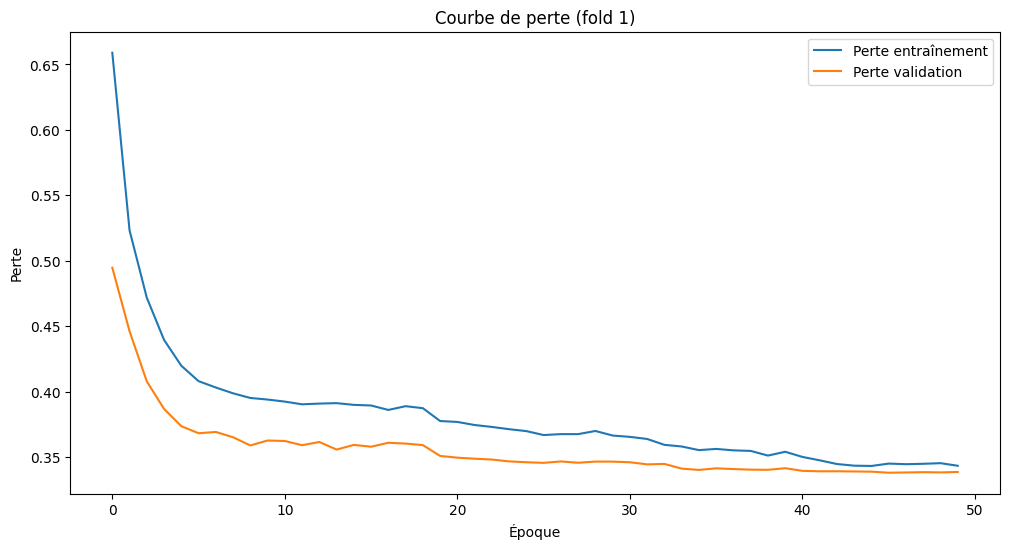

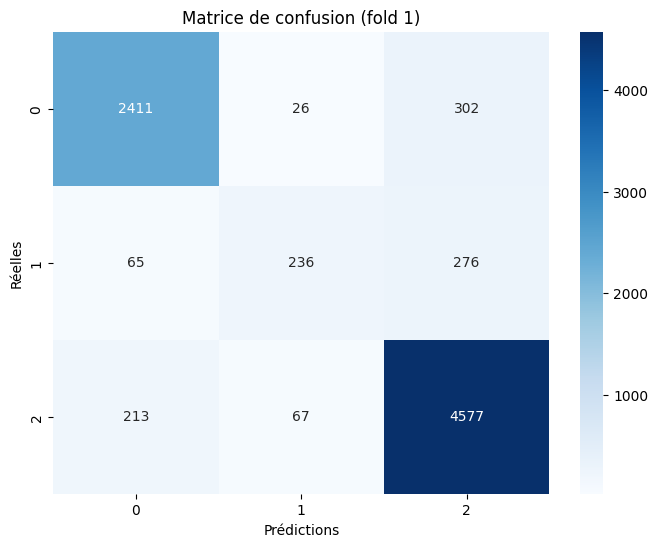

Epoch 1/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7055 - loss: 0.9582 - val_accuracy: 0.8723 - val_loss: 0.4935 - learning_rate: 0.0010
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8586 - loss: 0.5346 - val_accuracy: 0.8747 - val_loss: 0.4424 - learning_rate: 0.0010
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8672 - loss: 0.4741 - val_accuracy: 0.8800 - val_loss: 0.4077 - learning_rate: 0.0010
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8671 - loss: 0.4477 - val_accuracy: 0.8773 - val_loss: 0.3872 - learning_rate: 0.0010
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8693 - loss: 0.4203 - val_accuracy: 0.8779 - val_loss: 0.3770 - learning_rate: 0.0010
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8725 - loss: 0.4031 - val_accuracy: 0.8781 - val_loss: 0.3712 - learning_rate: 0.0010
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8695 - l

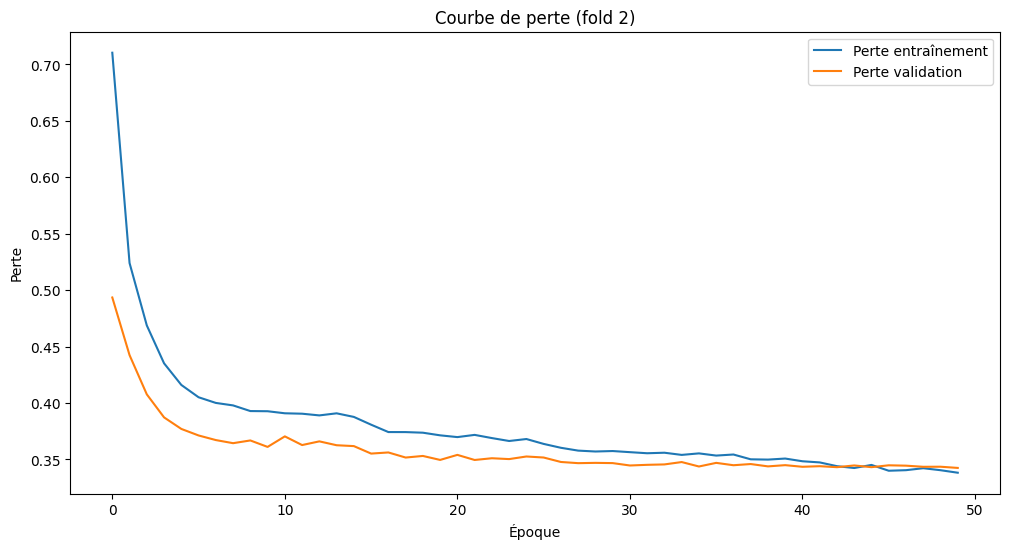

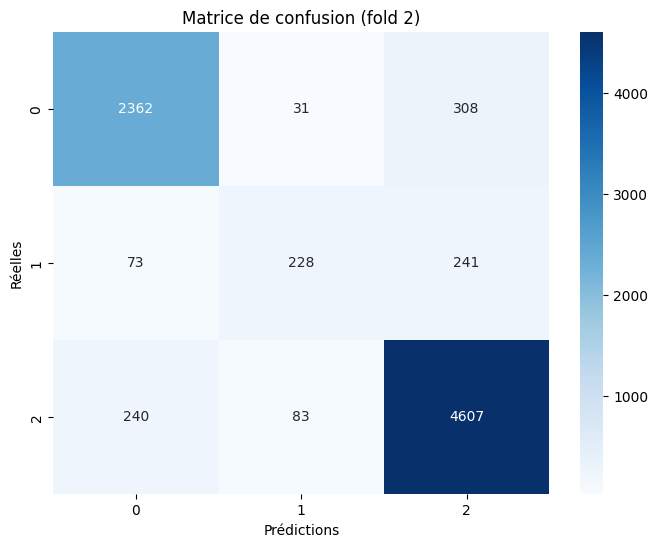

Epoch 1/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7845 - loss: 0.7722 - val_accuracy: 0.8729 - val_loss: 0.4815 - learning_rate: 0.0010
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8580 - loss: 0.5244 - val_accuracy: 0.8735 - val_loss: 0.4386 - learning_rate: 0.0010
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8633 - loss: 0.4760 - val_accuracy: 0.8745 - val_loss: 0.4065 - learning_rate: 0.0010
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8666 - loss: 0.4489 - val_accuracy: 0.8763 - val_loss: 0.3844 - learning_rate: 0.0010
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8686 - loss: 0.4194 - val_accuracy: 0.8710 - val_loss: 0.3827 - learning_rate: 0.0010
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8721 - loss: 0.4041 - val_accuracy: 0.8745 - val_loss: 0.3696 - learning_rate: 0.0010
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8662 - l

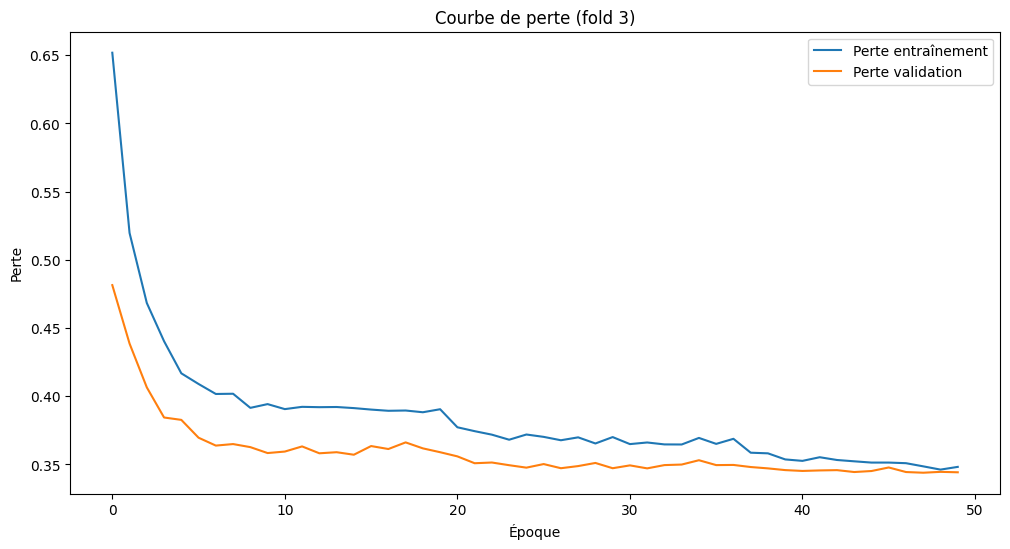

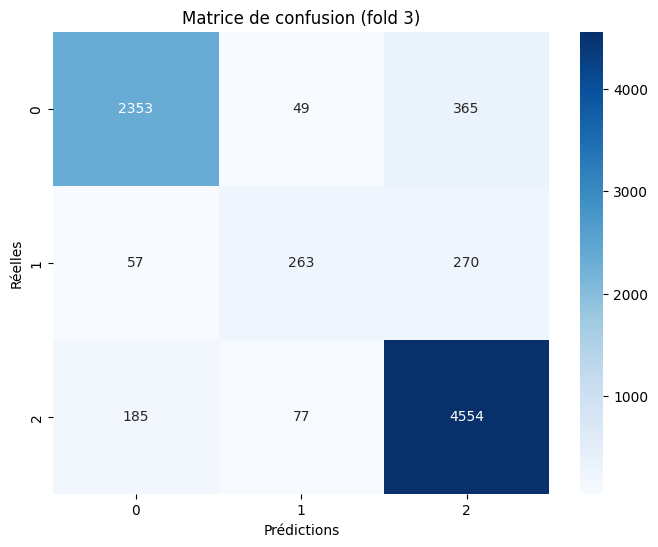

Epoch 1/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7709 - loss: 0.7902 - val_accuracy: 0.8744 - val_loss: 0.4850 - learning_rate: 0.0010
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8549 - loss: 0.5405 - val_accuracy: 0.8762 - val_loss: 0.4390 - learning_rate: 0.0010
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8620 - loss: 0.4779 - val_accuracy: 0.8770 - val_loss: 0.4040 - learning_rate: 0.0010
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8634 - loss: 0.4438 - val_accuracy: 0.8769 - val_loss: 0.3840 - learning_rate: 0.0010
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8705 - loss: 0.4141 - val_accuracy: 0.8797 - val_loss: 0.3699 - learning_rate: 0.0010
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8655 - loss: 0.4146 - val_accuracy: 0.8791 - val_loss: 0.3632 - learning_rate: 0.0010
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8666 - 

Fold 4 - Accuracy : 0.8841
Meilleur modèle mis à jour (Fold 4, Accuracy: 0.8841)


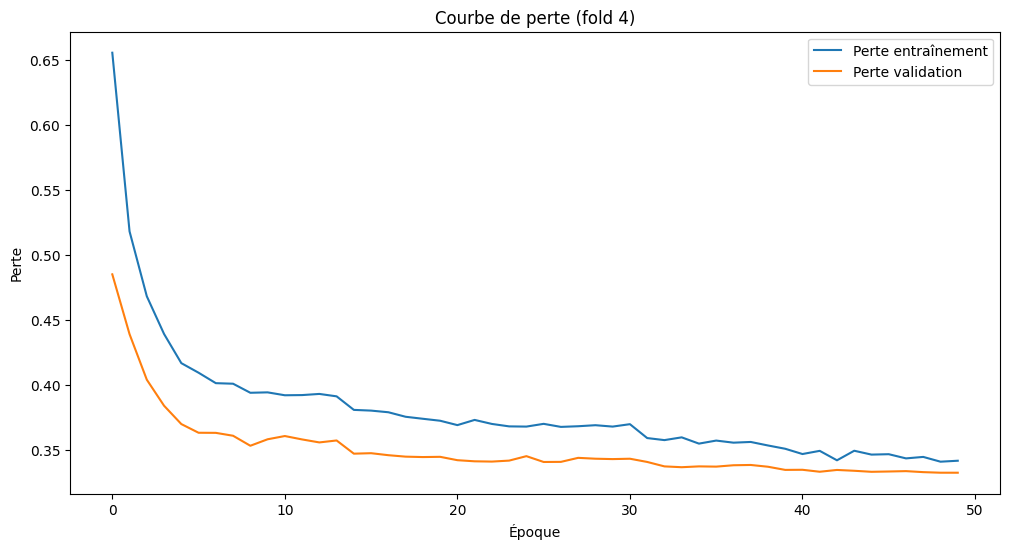

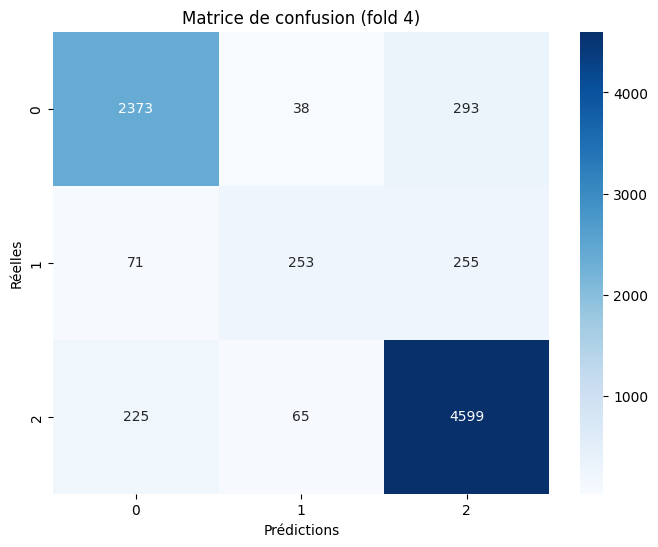

Epoch 1/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7783 - loss: 0.7732 - val_accuracy: 0.8839 - val_loss: 0.4691 - learning_rate: 0.0010
Epoch 2/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8557 - loss: 0.5420 - val_accuracy: 0.8844 - val_loss: 0.4218 - learning_rate: 0.0010
Epoch 3/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.8611 - loss: 0.4843 - val_accuracy: 0.8888 - val_loss: 0.3832 - learning_rate: 0.0010
Epoch 4/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8639 - loss: 0.4524 - val_accuracy: 0.8884 - val_loss: 0.3636 - learning_rate: 0.0010
Epoch 5/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8647 - loss: 0.4280 - val_accuracy: 0.8867 - val_loss: 0.3524 - learning_rate: 0.0010
Epoch 6/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8652 - loss: 0.4243 - val_accuracy: 0.8850 - val_loss: 0.3458 - learning_rate: 0.0010
Epoch 7/50
1022/1022 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8669 - 

Fold 5 - Accuracy : 0.8917
Meilleur modèle mis à jour (Fold 5, Accuracy: 0.8917)


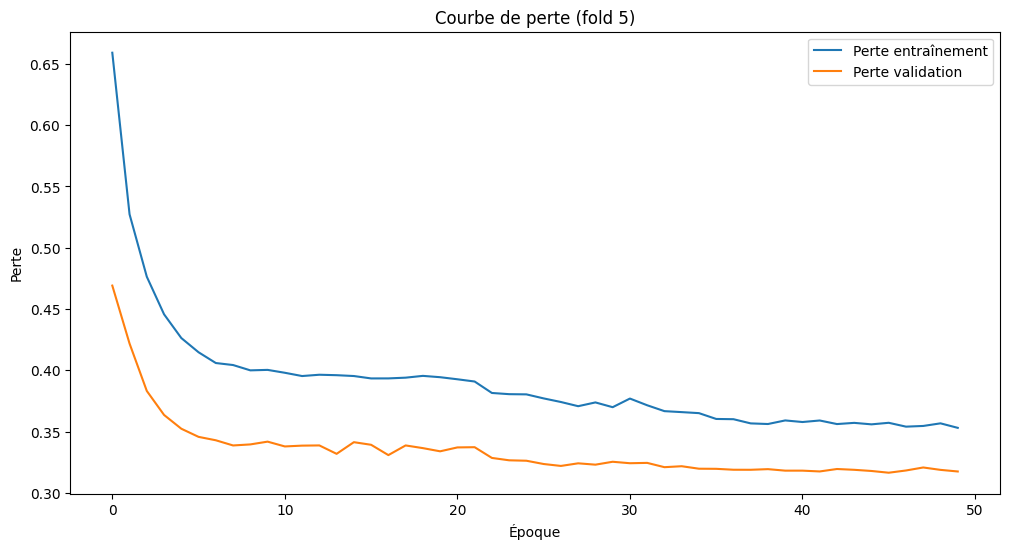

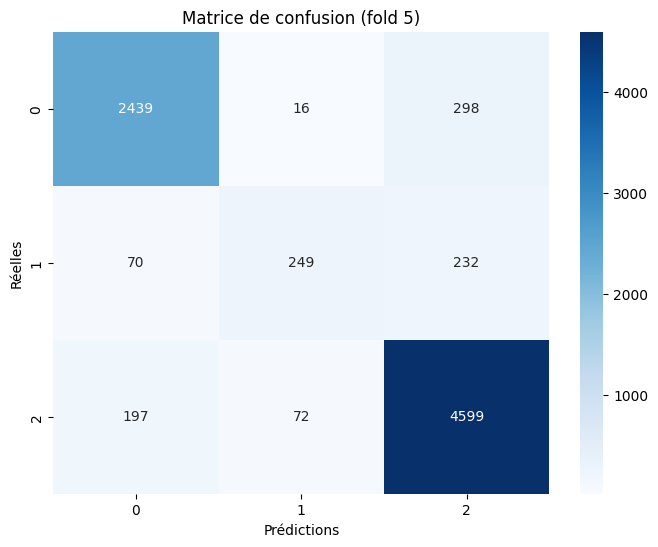


Précision moyenne : 0.8835
Écart type de la précision : 0.0048
Meilleur modèle sauvegardé : Fold 5 avec une précision de 0.8917


In [6]:
accuracy_scores = []
best_accuracy = 0  # Variable pour suivre la meilleure précision
best_fold = -1  # Stocke l'indice du meilleur fold
best_model_path = "best_fold_model.h5"  # Fichier pour stocker le meilleur modèle

for fold, (train_index, test_index) in enumerate(kf.split(input_data)):
    X_train, X_test = input_data[train_index], input_data[test_index]
    y_train, y_test = output_data_onehot[train_index], output_data_onehot[test_index]

    # Création du modèle
    model = create_model()

    # Callbacks pour optimiser l'entraînement
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    reduce_lr = keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

    # Entraînement du modèle
    history = model.fit(
        X_train, y_train,
        epochs=50,
        batch_size=32,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping, reduce_lr],
        verbose=1
    )

    # Évaluation du modèle
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    accuracy_scores.append(accuracy)

    print(f"Fold {fold+1} - Accuracy : {accuracy:.4f}")

    # Sauvegarde du meilleur modèle
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_fold = fold + 1  # Fold commence à 0, donc on ajoute 1
        model.save(best_model_path)
        print(f"Meilleur modèle mis à jour (Fold {best_fold}, Accuracy: {best_accuracy:.4f})")

    # Affichage des courbes de perte
    plt.figure(figsize=(12, 6))
    plt.plot(history.history['loss'], label='Perte entraînement')
    plt.plot(history.history['val_loss'], label='Perte validation')
    plt.xlabel('Époque')
    plt.ylabel('Perte')
    plt.legend()
    plt.title(f'Courbe de perte (fold {fold+1})')
    plt.show()

    # Matrice de confusion
    cm = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Prédictions')
    plt.ylabel('Réelles')
    plt.title(f'Matrice de confusion (fold {fold+1})')
    plt.show()

# Affichage des performances globales
print(f"\nPrécision moyenne : {np.mean(accuracy_scores):.4f}")
print(f"Écart type de la précision : {np.std(accuracy_scores):.4f}")
print(f"Meilleur modèle sauvegardé : Fold {best_fold} avec une précision de {best_accuracy:.4f}")


2504/2504 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


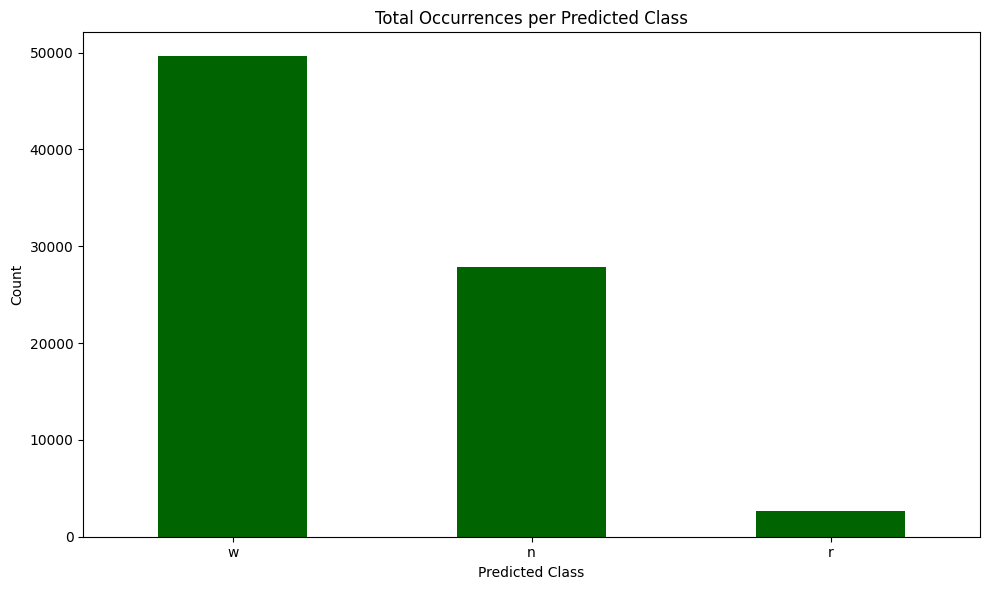

In [31]:
# Import des données
competition_data = pd.read_csv('EEG_mouse_data_test.csv')
competition_data = competition_data.iloc[:, :25]

# Charger le meilleur modèle
best_model = load_model("best_fold_model.h5")

# Normaliser les données de test avec le même scaler
X_test_normalized = scaler.fit_transform(competition_data)

# Prédictions sur les données de test (probabilités)
y_pred_test = best_model.predict(X_test_normalized)

# Obtenir les classes prédites avec np.argmax
y_pred_classes = np.argmax(y_pred_test, axis=1)

# Créer un mappage des indices de classe vers des lettres
class_mapping = {0: 'n', 1: 'r', 2: 'w'}

# Appliquer le mappage aux prédictions
y_pred_classes_mapped = np.array([class_mapping[class_idx] for class_idx in y_pred_classes])

# Sauvegarder les classes prédites avec lettres (n, r, w)
np.save("TestPred_Competition_PiemontesiTrueb.npy", y_pred_classes_mapped)

# Convertir les prédictions en pandas Series pour utiliser value_counts
y_pred_test_series = pd.Series(y_pred_classes_mapped)

# Créer un barplot des occurrences des classes
plt.figure(figsize=(10, 6))
y_pred_test_series.value_counts().plot(kind='bar', color='darkgreen')

# Ajouter des labels et un titre
plt.title('Total Occurrences per Predicted Class')
plt.xlabel('Predicted Class')
plt.ylabel('Count')

# Rotation des labels sur l'axe x
plt.xticks(rotation=0)

# Mise en forme du graphique
plt.tight_layout()
plt.show()